In [1]:
import datetime as dt
from pathlib import Path

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import dask
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import xarray as xr

from mcs_prime import McsTracks
from mcs_prime.mcs_prime_config import PATHS
from mcs_prime import plotting as mplt

from remake import load_remake

In [2]:
era5_hists = load_remake('../../remakefiles/era5_histograms.py')

In [9]:
t = era5_hists.Era5MeanField.tasks.get(month=1)

In [13]:
mf = xr.open_mfdataset([t.outputs['meanfield'] for t in era5_hists.Era5MeanField.tasks]).load()

In [15]:
times = pd.DatetimeIndex(mf.time)

In [16]:
times

DatetimeIndex(['2020-01-16 11:30:00', '2020-02-15 11:30:00',
               '2020-03-16 11:30:00', '2020-04-15 23:30:00',
               '2020-05-16 11:30:00', '2020-06-15 23:30:00',
               '2020-07-16 11:30:00', '2020-08-16 11:30:00',
               '2020-09-15 23:30:00', '2020-10-16 11:30:00',
               '2020-11-15 23:30:00', '2020-12-16 11:30:00'],
              dtype='datetime64[ns]', freq=None)

In [20]:
mf.cape.max()

<xarray.DataArray 'cape' ()>
array(6505.187, dtype=float32)

djf [12, 1, 2]
mam [3, 4, 5]
jja [6, 7, 8]
son [9, 10, 11]


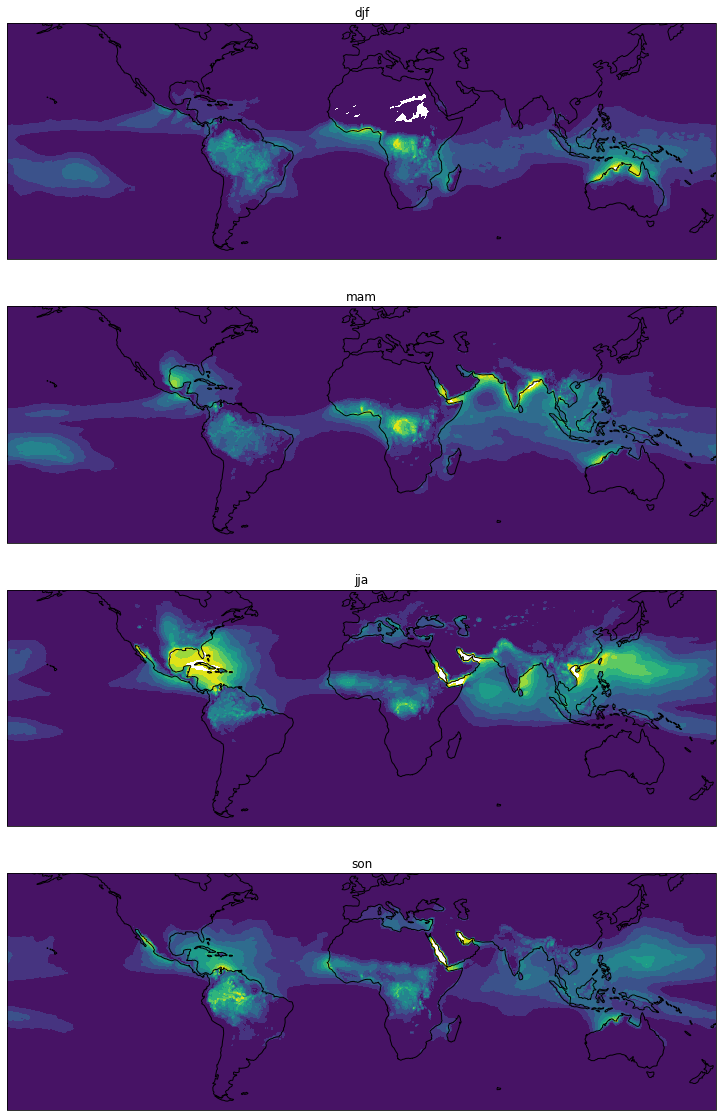

In [22]:
fig, axes = plt.subplots(4, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.set_size_inches(20, 20)

for ax, season, months in zip(axes, ['djf', 'mam', 'jja', 'son'], [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]):
    print(season, months)
    mf_season = mf.isel(time=times.month.isin(months))
    # print(mf_season)
    ax.contourf(mf.longitude, mf.latitude, mf_season.mean(dim='time').cape, levels=np.linspace(0, 2000, 11))
    ax.coastlines()
    ax.set_title(season)